In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
patient_data = pd.read_csv('Patientdata.csv')
hospital_data = pd.read_csv('Hospitaldata.csv')
diagnosis_data = pd.read_csv('Diagnosisdata.csv')

In [3]:
data = patient_data.merge(hospital_data, on="patientID", how="inner")

In [4]:
data = pd.concat([patient_data, hospital_data, diagnosis_data], axis=1)
data = data.loc[:,~data.columns.duplicated()]

In [5]:
data.drop(['patientID', 'AdmissionID'], inplace=True, axis=1)

In [6]:
data.head().T

,0,1,2,3,4
race,type3,type1,type3,type3,type3
gender,Female,Male,Female,Female,Male
age,[90-100),[50-60),[80-90),[50-60),[60-70)
weight,NaN,NaN,NaN,NaN,NaN
Target,No,Yes,No,No,Yes
istrain,1,1,1,1,1
Admission_date,2015-05-04,2014-02-20,2015-06-01,2015-12-18,2015-08-19
Discharge_date,2015-05-07,2014-02-23,2015-06-04,2015-12-20,2015-08-20
admission_type_id,1,1,1,2,3
admission_source_id,1,7,7,1,1


In [7]:
data.shape

(31513, 39)

In [8]:
pd.DataFrame(list(zip(data.columns, data.dtypes, data.isnull().sum())), columns=['title', 'datatype', 'missing_values'])

,title,datatype,missing_values
0,race,object,0
1,gender,object,0
2,age,object,0
3,weight,object,30569
4,Target,object,7257
5,istrain,int64,0
6,Admission_date,object,0
7,Discharge_date,object,0
8,admission_type_id,int64,0
9,admission_source_id,int64,0


In [9]:
def create_dummies(col, frequency=0):
    freqs=data[col].value_counts()
    k=freqs.index[freqs>frequency][:-1]
    for cat in k:
        name=col+'_'+str(cat)
        data[name]=(data[col]==cat).astype(int)
    del data[col]
    print(col)


In [10]:
create_dummies('admission_source_id', 50)
create_dummies('admission_type_id', 100)
create_dummies('race')

admission_source_id
admission_type_id
race


In [11]:
#dropping columns having more than half null values
data.drop(['weight', 'payer_code', 'medical_specialty'], axis=1, inplace=True)

In [12]:
# Converting admission date and discharge date into no of days in hospital
data['days_in_hospital'] = (pd.to_datetime(data.Discharge_date) - pd.to_datetime(data.Admission_date))/np.timedelta64(1, 'D')
# Removing Admission date and Discharge date
data.drop(['Admission_date', 'Discharge_date'], axis=1, inplace=True)
age = data.age.str.split("-", expand = True)
data.age = (pd.to_numeric(age[0].str.replace("[", "")) + pd.to_numeric(age[1].str.replace(")", ""))) / 2
data.head()

,gender,age,Target,istrain,num_procedures,num_medications,num_diagnoses,max_glu_serum,A1Cresult,metformin,...,admission_type_id_1,admission_type_id_3,admission_type_id_2,admission_type_id_6,admission_type_id_5,race_type3,race_type1,race_type4,race_type5,days_in_hospital
0,Female,95.0,No,1,0,11,9,None,None,No,...,1,0,0,0,0,1,0,0,0,3.0
1,Male,55.0,Yes,1,1,6,6,None,None,No,...,1,0,0,0,0,0,1,0,0,3.0
2,Female,85.0,No,1,2,27,9,None,None,No,...,1,0,0,0,0,1,0,0,0,3.0
3,Female,55.0,No,1,3,10,5,None,None,No,...,0,0,1,0,0,1,0,0,0,2.0
4,Male,65.0,Yes,1,6,12,9,None,None,No,...,0,1,0,0,0,1,0,0,0,1.0


In [13]:
# create_dummies('nateglinide', 100)
# create_dummies('chlorpropamide', 10)
# create_dummies('tolbutamide', 10)
# data.drop(['nateglinide', 'chlorpropamide', 'tolbutamide'], axis=1, inplace=True)

In [14]:
data.drop(['nateglinide', 'chlorpropamide', 'tolbutamide', 'acetohexamide', 'miglitol', 'troglitazone', 'glipizide.metformin', 'metformin.rosiglitazone', 'metformin.pioglitazone'], axis=1, inplace=True)

In [15]:
data.shape

(31513, 41)

In [16]:
categorical_columns = data.select_dtypes(['object']).columns

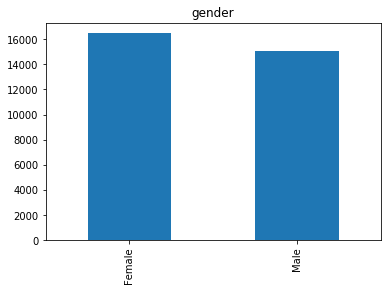

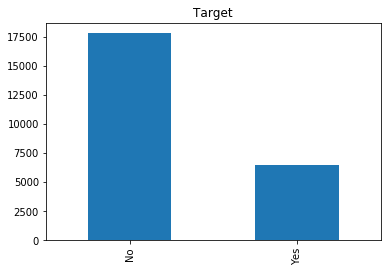

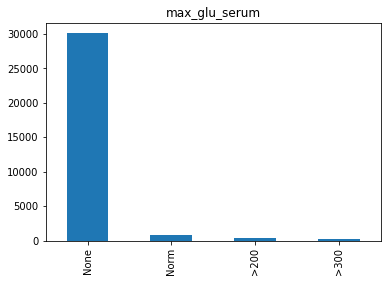

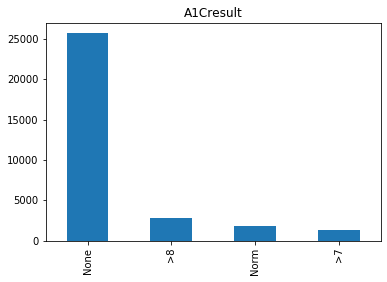

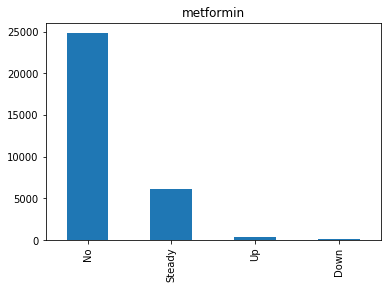

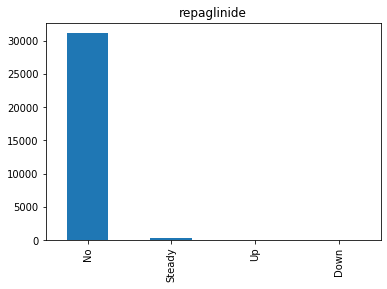

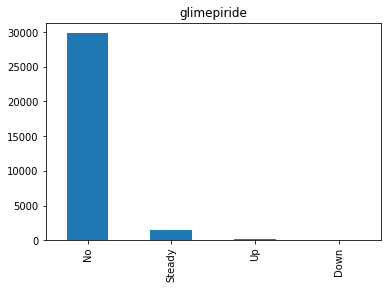

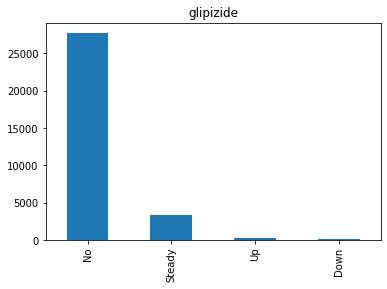

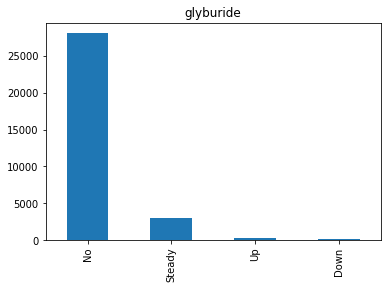

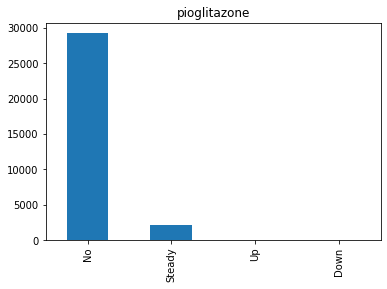

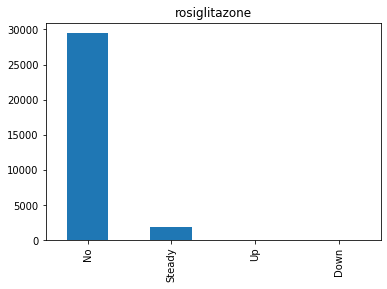

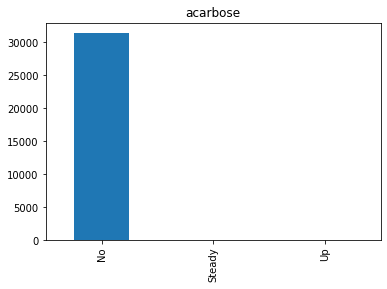

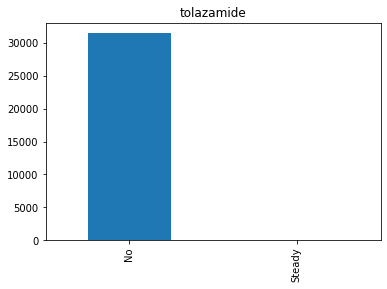

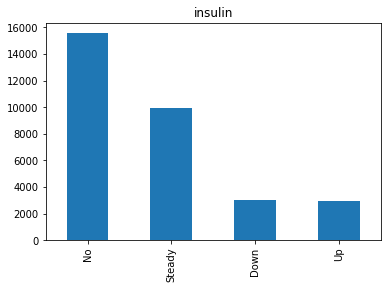

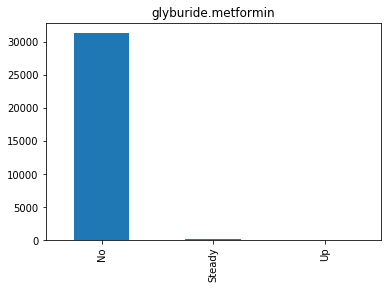

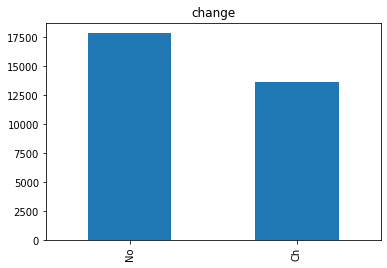

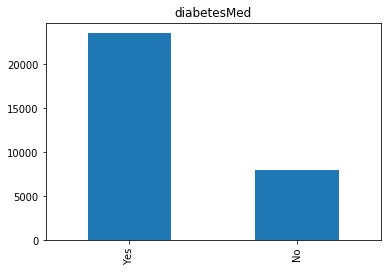

In [17]:
for col in categorical_columns:
    data[col].value_counts().plot.bar(title=col)
    plt.show()

------------------------gender and Target---------------------------
Target    No   Yes
gender            
Female  9304  3423
Male    8482  3047


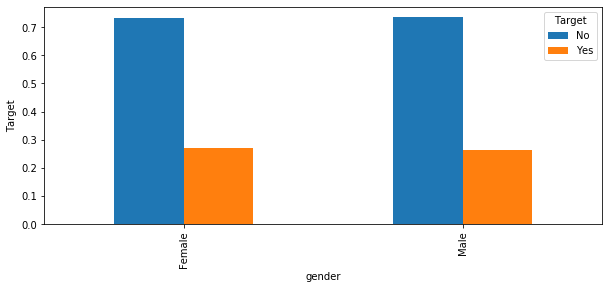

------------------------Target and Target---------------------------
Target     No   Yes
Target             
No      17786     0
Yes         0  6470


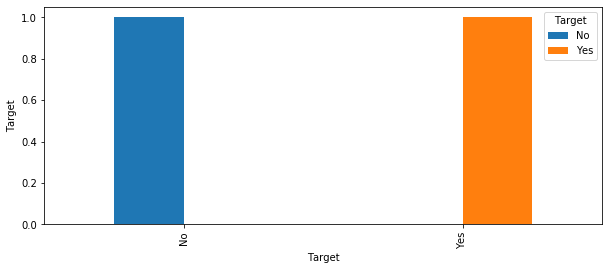

------------------------max_glu_serum and Target---------------------------
Target            No   Yes
max_glu_serum             
>200             221    80
>300             148    68
None           16988  6159
Norm             429   163


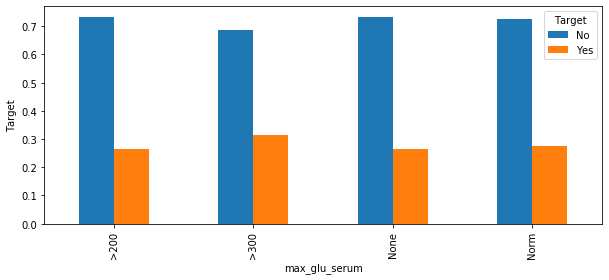

------------------------A1Cresult and Target---------------------------
Target        No   Yes
A1Cresult             
>7           740   263
>8          1549   552
None       14456  5309
Norm        1041   346


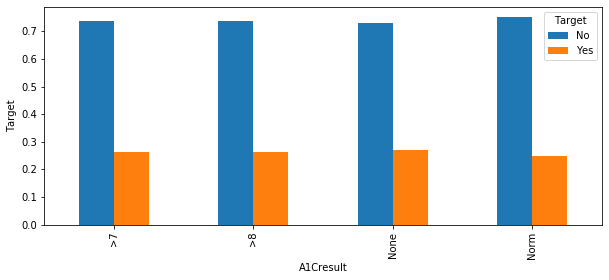

------------------------metformin and Target---------------------------
Target        No   Yes
metformin             
Down         102    45
No         13952  5142
Steady      3513  1196
Up           219    87


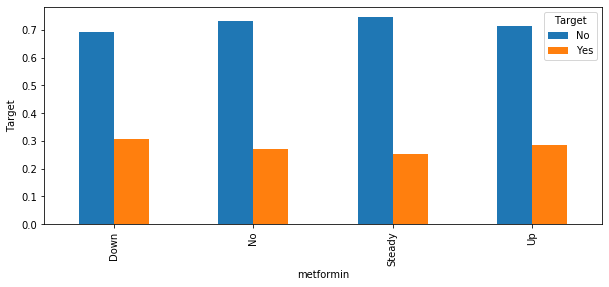

------------------------repaglinide and Target---------------------------
Target          No   Yes
repaglinide             
Down             6     2
No           17584  6378
Steady         179    83
Up              17     7


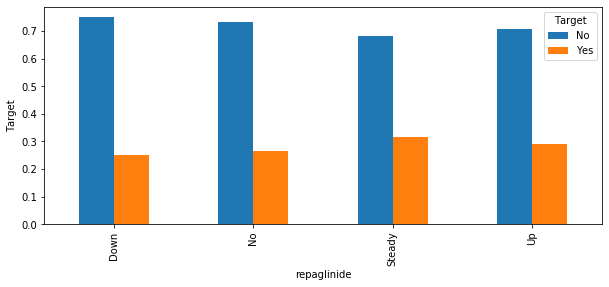

------------------------glimepiride and Target---------------------------
Target          No   Yes
glimepiride             
Down            33    18
No           16841  6145
Steady         848   292
Up              64    15


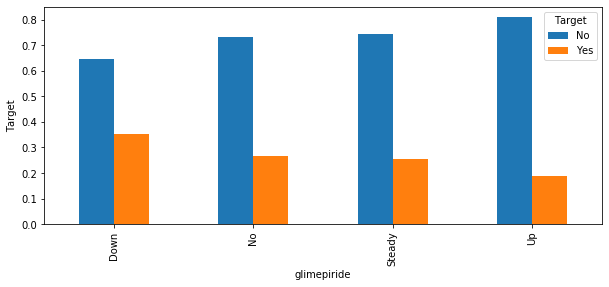

------------------------glipizide and Target---------------------------
Target        No   Yes
glipizide             
Down          83    34
No         15688  5655
Steady      1875   721
Up           140    60


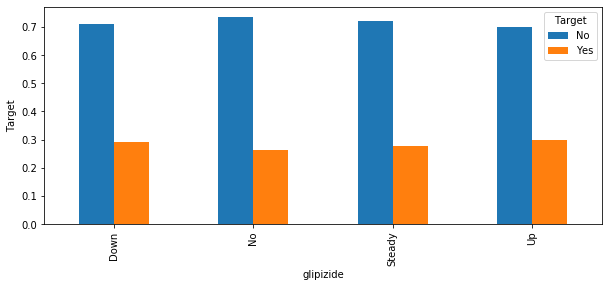

------------------------glyburide and Target---------------------------
Target        No   Yes
glyburide             
Down          99    34
No         15902  5725
Steady      1632   655
Up           153    56


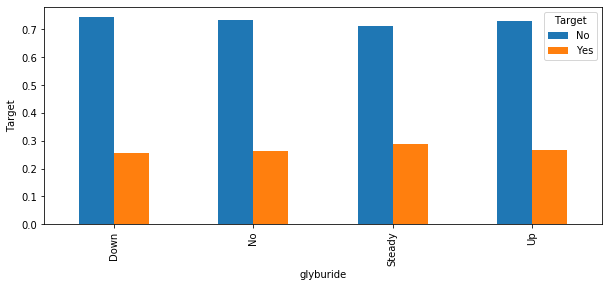

------------------------pioglitazone and Target---------------------------
Target           No   Yes
pioglitazone             
Down              9     8
No            16534  5993
Steady         1201   454
Up               42    15


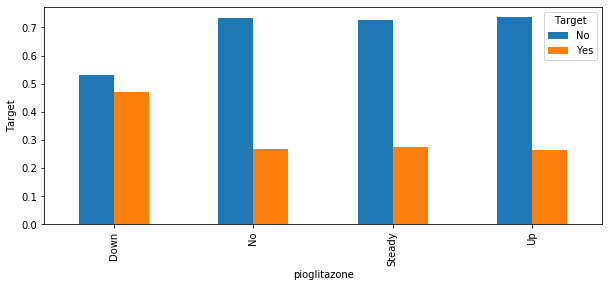

------------------------rosiglitazone and Target---------------------------
Target            No   Yes
rosiglitazone             
Down              28     3
No             16648  6046
Steady          1069   412
Up                41     9


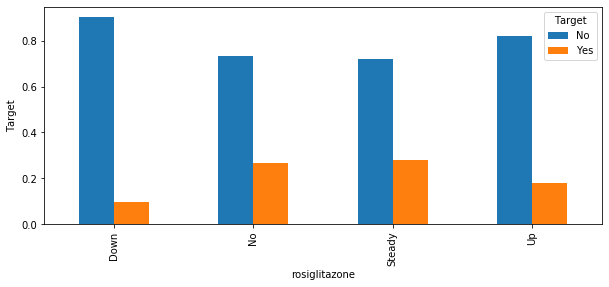

------------------------acarbose and Target---------------------------
Target       No   Yes
acarbose             
No        17737  6449
Steady       47    18
Up            2     3


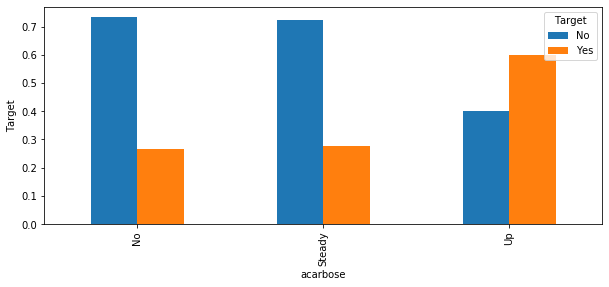

------------------------tolazamide and Target---------------------------
Target         No   Yes
tolazamide             
No          17780  6466
Steady          6     4


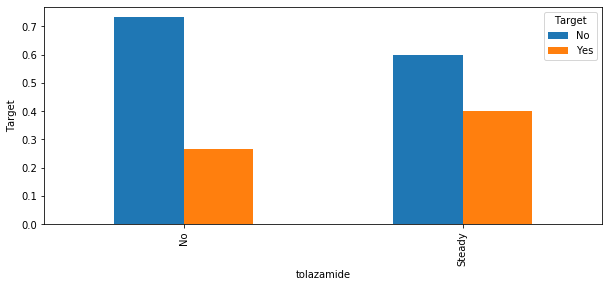

------------------------insulin and Target---------------------------
Target     No   Yes
insulin            
Down     1695   708
No       8943  3044
Steady   5528  2098
Up       1620   620


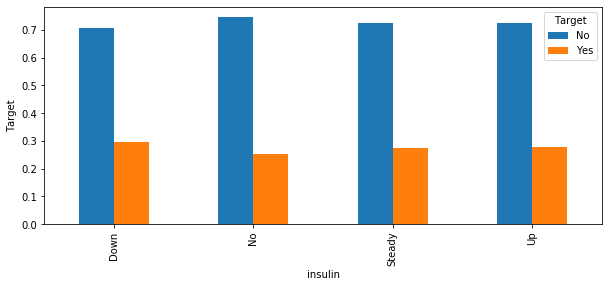

------------------------glyburide.metformin and Target---------------------------
Target                  No   Yes
glyburide.metformin             
No                   17685  6426
Steady                  99    43
Up                       2     1


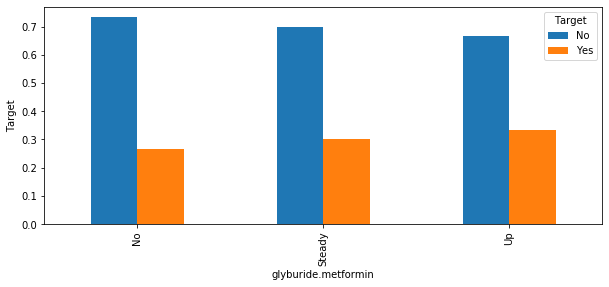

------------------------change and Target---------------------------
Target     No   Yes
change             
Ch       7641  2918
No      10145  3552


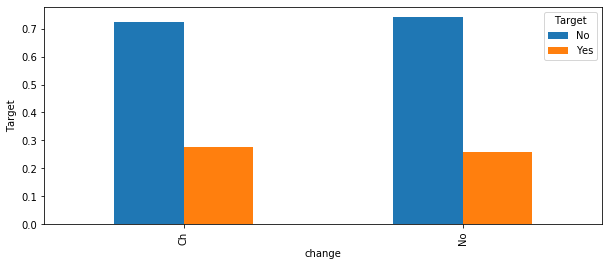

------------------------diabetesMed and Target---------------------------
Target          No   Yes
diabetesMed             
No            4697  1438
Yes          13089  5032


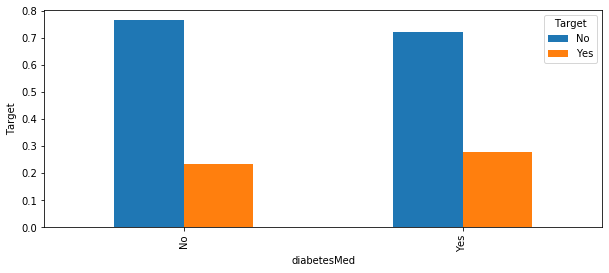

In [18]:
for col in categorical_columns:
    stats = pd.crosstab(data[col],data['Target'])
    print("------------------------" + col + " and Target" + "---------------------------")
    print(stats)
    stats.div(stats.sum(1).astype(float), axis = 0).plot(kind="bar", figsize=(10,4))
    plt.xlabel(col)
    plt.ylabel('Target')
    plt.show()

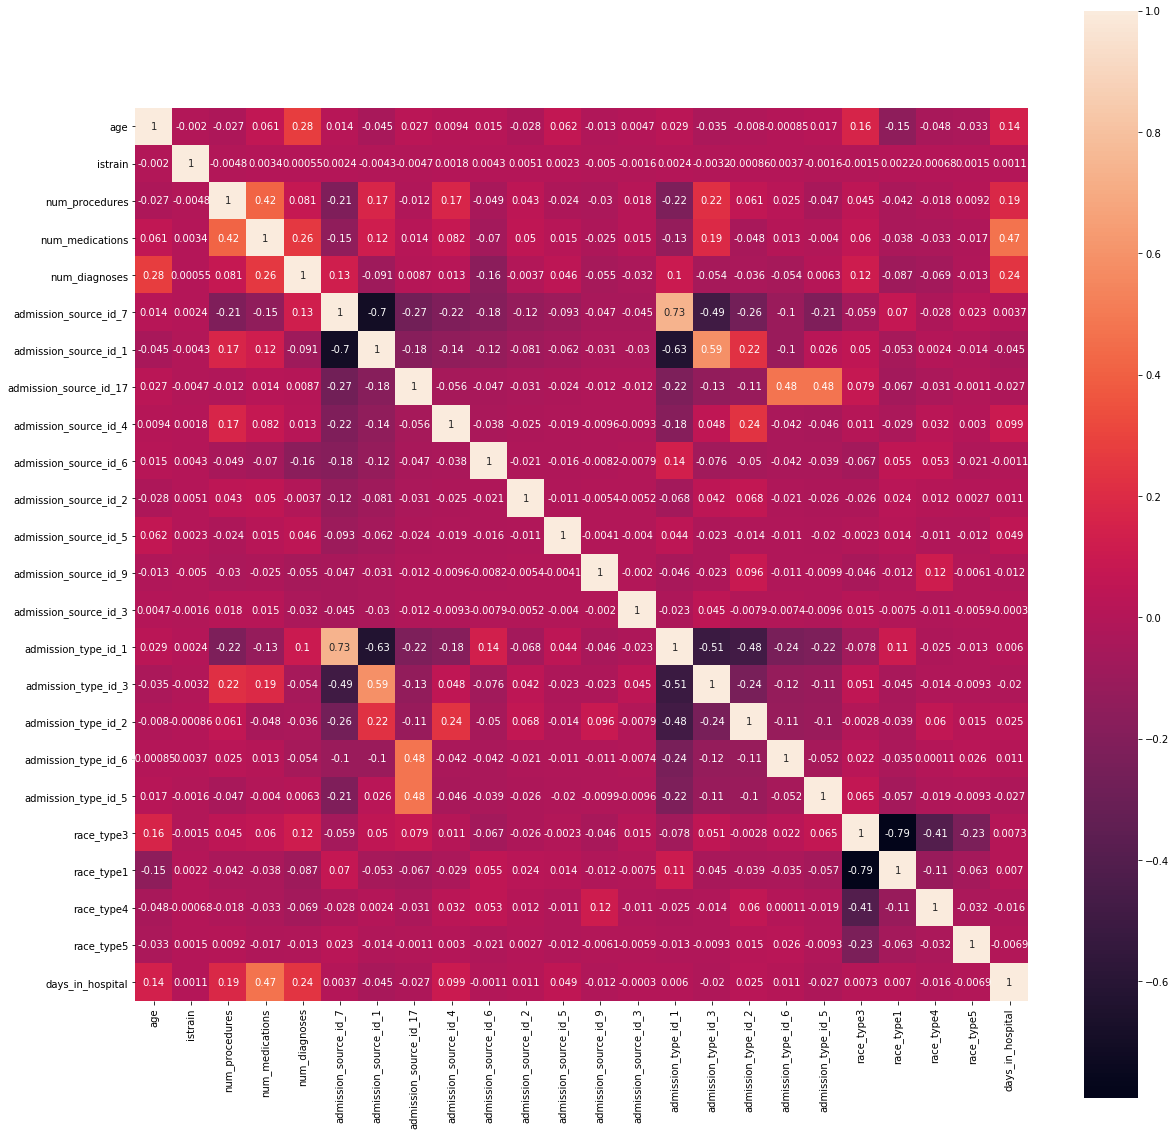

In [19]:
plt.subplots(figsize=(20,20))
sns.heatmap(data.corr(), vmax=1, square=True, annot=True, )

In [20]:
data = pd.get_dummies(data, columns=categorical_columns[categorical_columns != 'Target'], prefix= categorical_columns[categorical_columns != 'Target'], drop_first=True)

In [21]:
data.head().T

,0,1,2,3,4
age,95,55,85,55,65
Target,No,Yes,No,No,Yes
istrain,1,1,1,1,1
num_procedures,0,1,2,3,6
num_medications,11,6,27,10,12
...,...,...,...,...,...
insulin_Up,0,0,0,0,0
glyburide.metformin_Steady,0,0,0,0,0
glyburide.metformin_Up,0,0,0,0,0
change_No,0,1,1,1,1


In [22]:
data.shape

(31513, 63)

In [23]:
data.Target.replace('Yes', 1, inplace=True)
data.Target.replace('No', 0, inplace=True)

In [24]:
train_data = data.loc[data.istrain == 1, :]
test_data = data.loc[data.istrain == 0, :]
train_data.drop(['istrain'], axis=1, inplace=True)
test_data.drop(['Target', 'istrain'], axis=1, inplace=True)

In [25]:
train_data.head().T

,0,1,2,3,4
age,95.0,55.0,85.0,55.0,65.0
Target,0.0,1.0,0.0,0.0,1.0
num_procedures,0.0,1.0,2.0,3.0,6.0
num_medications,11.0,6.0,27.0,10.0,12.0
num_diagnoses,9.0,6.0,9.0,5.0,9.0
...,...,...,...,...,...
insulin_Up,0.0,0.0,0.0,0.0,0.0
glyburide.metformin_Steady,0.0,0.0,0.0,0.0,0.0
glyburide.metformin_Up,0.0,0.0,0.0,0.0,0.0
change_No,0.0,1.0,1.0,1.0,1.0


In [26]:
# train_data.drop(['nateglinde_no', 'chlorpropamide_no',
#        'tolbutamide_no','max_glu_serum_>300',
#        'max_glu_serum_None', 'max_glu_serum_Norm', 'A1Cresult_>8',
#        'A1Cresult_None', 'A1Cresult_Norm', 'metformin_No', 'metformin_Steady',
#        'metformin_Up', 'repaglinide_No', 'repaglinide_Steady',
#        'repaglinide_Up', 'glimepiride_No', 'glimepiride_Steady',
#        'glimepiride_Up', 'glipizide_No', 'glipizide_Steady', 'glipizide_Up',
#        'glyburide_No', 'glyburide_Steady', 'glyburide_Up', 'pioglitazone_No',
#        'pioglitazone_Steady', 'pioglitazone_Up', 'rosiglitazone_No',
#        'rosiglitazone_Steady', 'rosiglitazone_Up', 'acarbose_Steady',
#        'acarbose_Up', 'tolazamide_Steady', 'insulin_No', 'insulin_Steady',
#        'insulin_Up', 'glyburide.metformin_Steady', 'glyburide.metformin_Up'], axis=1, inplace=True)

In [27]:
train_data.shape

(24256, 62)

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, classification_report, confusion_matrix

In [29]:
X_train, X_test, Y_train, Y_test = train_test_split(train_data.drop(['Target'], axis=1), train_data.loc[:,'Target'], test_size=0.3, random_state=0) 

In [30]:
print(X_train.shape, X_test.shape)

(16979, 61) (7277, 61)


# Logistic Regression

In [31]:
lr_classifier = LogisticRegression(random_state=0)

In [32]:
lr_classifier.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [33]:
y_pred = lr_classifier.predict(X_test)

In [34]:
accuracy_score(Y_test, y_pred)

0.73464339700426

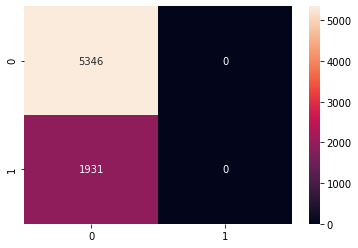

In [35]:
sns.heatmap(confusion_matrix(Y_test, y_pred), annot=True,  fmt='g')

In [36]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.73      1.00      0.85      5346
         1.0       0.00      0.00      0.00      1931

    accuracy                           0.73      7277
   macro avg       0.37      0.50      0.42      7277
weighted avg       0.54      0.73      0.62      7277



In [37]:
roc_auc_score(Y_test, y_pred)

0.5

# RandomizedSearchCV of LR

In [38]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [39]:
model = LogisticRegression(fit_intercept=True)
params = {
    'class_weight':['balanced', None],
    'C':np.linspace(0.01, 1000, 100),
    'penalty': ['l1', 'l2']
}

In [40]:
lr_search = RandomizedSearchCV(model, param_distributions=params,n_iter=30 ,cv=10, scoring="roc_auc")

In [41]:
lr_search.fit(X_train, Y_train)

RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=30, n_jobs=None,
                   param_distributions={'C'...
       8.48486364e+02, 8.58587273e+02, 8.68688182e+02, 8.78789091e+02,
       8.88890000e+02, 8.98990909e+02, 9.09091818e+02, 9.19192727e+02,
       9.29293636e+02, 9.39394545e+02, 9.49495455e+02, 9.59596364e+02,
       9.69697273e+0

In [42]:
lr_pred = lr_search.predict(X_test)

In [43]:
lr_search.best_estimator_

LogisticRegression(C=313.1381818181818, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [44]:
confusion_matrix(Y_test, lr_pred)

array([[2851, 2495],
       [ 874, 1057]], dtype=int64)

In [45]:
roc_auc_score(Y_test, lr_pred)

0.5403403484564656

In [46]:
print(classification_report(Y_test, lr_pred))

              precision    recall  f1-score   support

         0.0       0.77      0.53      0.63      5346
         1.0       0.30      0.55      0.39      1931

    accuracy                           0.54      7277
   macro avg       0.53      0.54      0.51      7277
weighted avg       0.64      0.54      0.56      7277



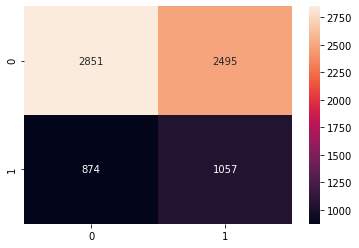

In [47]:
sns.heatmap(confusion_matrix(Y_test, lr_pred), annot=True,  fmt='g')

# KNN 

In [48]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors=5, metric="minkowski", p=2)
knn_classifier.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [49]:
knn_pred = knn_classifier.predict(X_test)

In [50]:
confusion_matrix(Y_test, knn_pred)

array([[4699,  647],
       [1673,  258]], dtype=int64)

In [51]:
roc_auc_score(Y_test, knn_pred)

0.5062922316360373

In [52]:
params = {
    "n_neighbors" : list(range(1,30)),
    "p" : [1,2]
}
knn_classifier = KNeighborsClassifier(metric="minkowski")
knn_search = RandomizedSearchCV(knn_classifier, param_distributions=params, cv=10, n_iter=20)

In [53]:
knn_search.fit(X_train, Y_train)
knn_predict = knn_search.predict(X_test)
confusion_matrix(Y_test, knn_pred)

array([[4699,  647],
       [1673,  258]], dtype=int64)

In [54]:
roc_auc_score(Y_test, knn_pred)

0.5062922316360373

# Naive Bayes

In [55]:
from sklearn.naive_bayes import GaussianNB
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, Y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [56]:
nb_pred = nb_classifier.predict(X_test)

In [57]:
confusion_matrix(Y_test, nb_pred)

array([[4930,  416],
       [1753,  178]], dtype=int64)

In [58]:
f1_score(Y_test, nb_pred)

0.14099009900990098

# Decision Tree

In [59]:
from sklearn.tree import DecisionTreeClassifier

In [60]:
dt_classifier = DecisionTreeClassifier(criterion='entropy', random_state=0, class_weight='balanced')

In [61]:
dt_classifier.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=None, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=0, splitter='best')

In [62]:
dt_pred = dt_classifier.predict(X_test)

In [63]:
confusion_matrix(Y_test, dt_pred)

array([[3874, 1472],
       [1417,  514]], dtype=int64)

In [64]:
accuracy_score(Y_test, dt_pred)

0.6029957400027484

In [65]:
from sklearn.model_selection import RandomizedSearchCV

In [66]:
model = DecisionTreeClassifier(random_state=0)
params = {
    'class_weight': [None, 'balanced'],
    'criterion': ['entropy', 'gini'],
    'max_depth': [None, 5, 10, 15, 20, 30, 50],
    'max_features': [5, 10, 15, 20, None]
}

In [67]:
dt_search = RandomizedSearchCV(model, param_distributions=params, scoring='roc_auc', n_iter=30)

In [68]:
dt_search.fit(X_train, Y_train)

RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort='deprecated',
                                                    random_state=0,
          

In [69]:
dt_search.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=15, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [70]:
dt_pred = dt_search.predict(X_test)

In [71]:
accuracy_score(Y_test, dt_pred)

0.7342311392057166

In [72]:
print(classification_report(Y_test, dt_pred))

              precision    recall  f1-score   support

         0.0       0.74      1.00      0.85      5346
         1.0       0.43      0.01      0.01      1931

    accuracy                           0.73      7277
   macro avg       0.58      0.50      0.43      7277
weighted avg       0.66      0.73      0.62      7277



In [73]:
f1_score(Y_test, dt_pred)

0.010235414534288638

In [74]:
confusion_matrix(Y_test, dt_pred)

array([[5333,   13],
       [1921,   10]], dtype=int64)

In [75]:
roc_auc_score(Y_test, dt_pred)

0.5013734696253829

In [76]:
# train_score = dt_search.best_estimator_.predict_proba(X_train)[:,1]
# real = Y_train
# cutoffs = np.linspace(0.1, 0.99, 99)
# ks_all = []
# for cutoff in cutoffs:
#     predicted = (train_score>cutoff).astype(int)
#     TP = ((predicted == 1) & (real == 1)).sum()
#     TN = ((predicted == 0) & (real == 0)).sum()
#     FP = ((predicted == 1) & (real == 0)).sum()
#     FN = ((predicted == 0) & (real == 1)).sum()
    
#     P = TP + FN
#     N = TN + FP
    
#     ks = (TP/P) - (FP/N)
#     ks_all.append(ks)
# mycutoff = cutoffs[ks_all == max(ks_all)][0]
# mycutoff

In [77]:
# pred = dt_search.best_estimator_.predict_proba(X_test)[:,1]

In [78]:
# pred = (pred >= mycutoff).astype('int')

In [79]:
# roc_auc_score(Y_test, pred)

# Random Forest

In [80]:
from sklearn.ensemble import RandomForestClassifier

In [81]:
rf_classifier = RandomForestClassifier(verbose=1, n_jobs=-1)
param_dist = {
    'n_estimators':[10, 20, 30, 50, 70, 100],
    'max_features':[5,10, 20, 25, 30],
    'bootstrap':[True, False],
    'class_weight':[None,'balanced'],
    'criterion':['gini','entropy']
}

In [82]:
rf_search = RandomizedSearchCV(rf_classifier, param_distributions=param_dist,
                                      n_iter=20, scoring='roc_auc', cv=10)

In [83]:
rf_search.fit(X_train, Y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    2.8s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    0.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    0.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 o

[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.8s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  30 out of  30 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.8s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  30 out of  30 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.8s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  30 out of  30 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.8s finished
[Parallel(n_jobs=8)]: Using backend Th

[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    0.1s remaining:    0.0s
[Pa

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    2.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.4s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  30 out of  30 | elapsed:    0.0s finished
[

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.9s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    1.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]:

[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.9s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.8s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.7s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  50 out of  50 | elapsed:    0.0s finished
[P

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.8s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  85 out of 100 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.7s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Pa

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  30 out of  30 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.3s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  30 out of  30 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.5s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  30 out of  30 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 o

[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:    1.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  70 out of  70 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:    1.4s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  70 out of  70 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:    1.2s finished
[Parallel(n_jobs=8)]: Using

RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
              

In [84]:
rf_search.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features=5,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=1,
                       warm_start=False)

In [85]:
rf_pred = rf_search.predict(X_test)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished


In [86]:
confusion_matrix(Y_test, rf_pred)

array([[5137,  209],
       [1851,   80]], dtype=int64)

In [87]:
accuracy_score(Y_test, rf_pred)

0.7169163116668957

In [88]:
print(classification_report(Y_test, rf_pred))

              precision    recall  f1-score   support

         0.0       0.74      0.96      0.83      5346
         1.0       0.28      0.04      0.07      1931

    accuracy                           0.72      7277
   macro avg       0.51      0.50      0.45      7277
weighted avg       0.61      0.72      0.63      7277



In [89]:
roc_auc_score(Y_test, rf_pred)

0.5011673305159696

# XGBoost

In [90]:
from xgboost import XGBClassifier

In [91]:
xgb_classifier = XGBClassifier(objective='binary:logistic')
params = {
    'learning_rate':[0.01,0.05,0.1,0.3,0.5],
    'subsample':[i/10.0 for i in range(5,10)],
    'colsample_bytree':[i/10.0 for i in range(5,10)],
    'reg_lambda':[1e-5,1e-2,0.1,1,100],
    'reg_alpha':[1e-5,1e-2,0.1,1,100],
    'n_estimators':[100,300,500]
}

In [92]:
xgb_search = RandomizedSearchCV(xgb_classifier, n_jobs=-1, cv=10, n_iter=20, 
                                  scoring='roc_auc', param_distributions=params)

In [93]:
xgb_search.fit(X_train, Y_train)

RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,...
                   iid='deprecated', n_iter=20, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.5, 0.6, 0.7, 0.8,
                                                             0.9],
                 

In [94]:
xgb_predict = xgb_search.predict(X_test)

In [95]:
accuracy_score(Y_test, xgb_predict)

0.73464339700426

In [96]:
confusion_matrix(Y_test, xgb_predict)

array([[5345,    1],
       [1930,    1]], dtype=int64)

In [97]:
roc_auc_score(Y_test, xgb_predict)

0.50016540532393

# Conclusion

In [98]:
final_model = lr_search.best_estimator_

In [99]:
pred = final_model.predict(test_data)

In [100]:
final_model.classes_

array([0., 1.])